In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('full.csv')

In [81]:
df.set_index('Unnamed: 0', inplace = True)

In [82]:
df.index.names = ['Date']

In [83]:
df.head()

,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
Date,,,,,,,,,
2008-07-31,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2008-10-01,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2008-10-10,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2008-10-13,1.3593,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2008-10-14,1.3624,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131


In [84]:
df.describe()

,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,1.261433,53.325513,51.122193,0.200076,0.436753,2.564337,2.526173,0.615472,0.447346
std,0.117666,5.708053,5.578351,0.690543,0.623340,1.280481,0.603533,0.677628,0.855529
min,1.038700,32.400000,33.500000,-2.978876,-2.163811,0.613300,1.500000,0.110000,-0.330400
25%,1.146500,51.100000,48.500000,-0.004350,0.134948,1.264300,2.040000,0.210000,-0.257200
50%,1.285100,53.700000,52.000000,0.402720,0.501903,2.684900,2.420000,0.300000,0.221400
75%,1.355600,57.000000,54.900000,0.540979,0.822715,3.867200,2.900000,0.750000,0.858500
max,1.514000,61.400000,60.600000,0.914216,1.253873,4.657400,3.850000,4.320000,5.113100


In [93]:
df.reset_index(inplace = True)

In [94]:
df.head()

,Date,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
0,2008-07-31,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
1,2008-10-01,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2,2008-10-10,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
3,2008-10-13,1.3593,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
4,2008-10-14,1.3624,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131


In [18]:
features = pd.get_dummies(df)

In [73]:
features

array([[38.9     , 41.3     , -0.572204, ...,  0.      ,  0.      ,
         0.      ],
       [38.9     , 41.3     , -0.572204, ...,  0.      ,  0.      ,
         0.      ],
       [38.9     , 41.3     , -0.572204, ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [57.7     , 52.      ,  0.449432, ...,  1.      ,  0.      ,
         0.      ],
       [57.7     , 52.      ,  0.449432, ...,  0.      ,  1.      ,
         0.      ],
       [57.7     , 52.      ,  0.449432, ...,  0.      ,  0.      ,
         1.      ]])

In [75]:
import numpy as np

In [21]:
labels = np.array(features['Price'])

In [22]:
features = features.drop('Price', axis = 1)

In [23]:
feature_list = list(features.columns)

In [24]:
features = np.array(features)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [28]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2010, 2689)
Training Labels Shape: (2010,)
Testing Features Shape: (671, 2689)
Testing Labels Shape: (671,)


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [34]:
rf.fit(train_features, train_labels);

In [35]:
predictions = rf.predict(test_features)

In [36]:
errors = abs(predictions - test_labels)

In [37]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [38]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [39]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.2 %.


In [42]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [44]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [45]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [46]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [47]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [48]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [49]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: STI EA19             Importance: 0.52
Variable: LTI EA19             Importance: 0.29
Variable: STI USA              Importance: 0.05
Variable: US PMI               Importance: 0.04
Variable: EURO PMI             Importance: 0.04
Variable: GDP EA19             Importance: 0.01
Variable: GDP USA              Importance: 0.01
Variable: LTI USA              Importance: 0.01
Variable: Date_2008-07-31      Importance: 0.0
Variable: Date_2008-10-01      Importance: 0.0
Variable: Date_2008-10-10      Importance: 0.0
Variable: Date_2008-10-13      Importance: 0.0
Variable: Date_2008-10-14      Importance: 0.0
Variable: Date_2008-10-15      Importance: 0.0
Variable: Date_2008-10-16      Importance: 0.0
Variable: Date_2008-10-17      Importance: 0.0
Variable: Date_2008-10-20      Importance: 0.0
Variable: Date_2008-10-21      Importance: 0.0
Variable: Date_2008-10-22      Importance: 0.0
Variable: Date_2008-10-23      Importance: 0.0
Variable: Date_2008-10-24      Importance: 0.0
Varia

In [51]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('STI EA19'), feature_list.index('LTI EA19')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.01
Accuracy: 99.02 %.


In [215]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['lines.linewidth'] = 1.2
plt.rcParams['lines.markersize'] = np.sqrt(20)

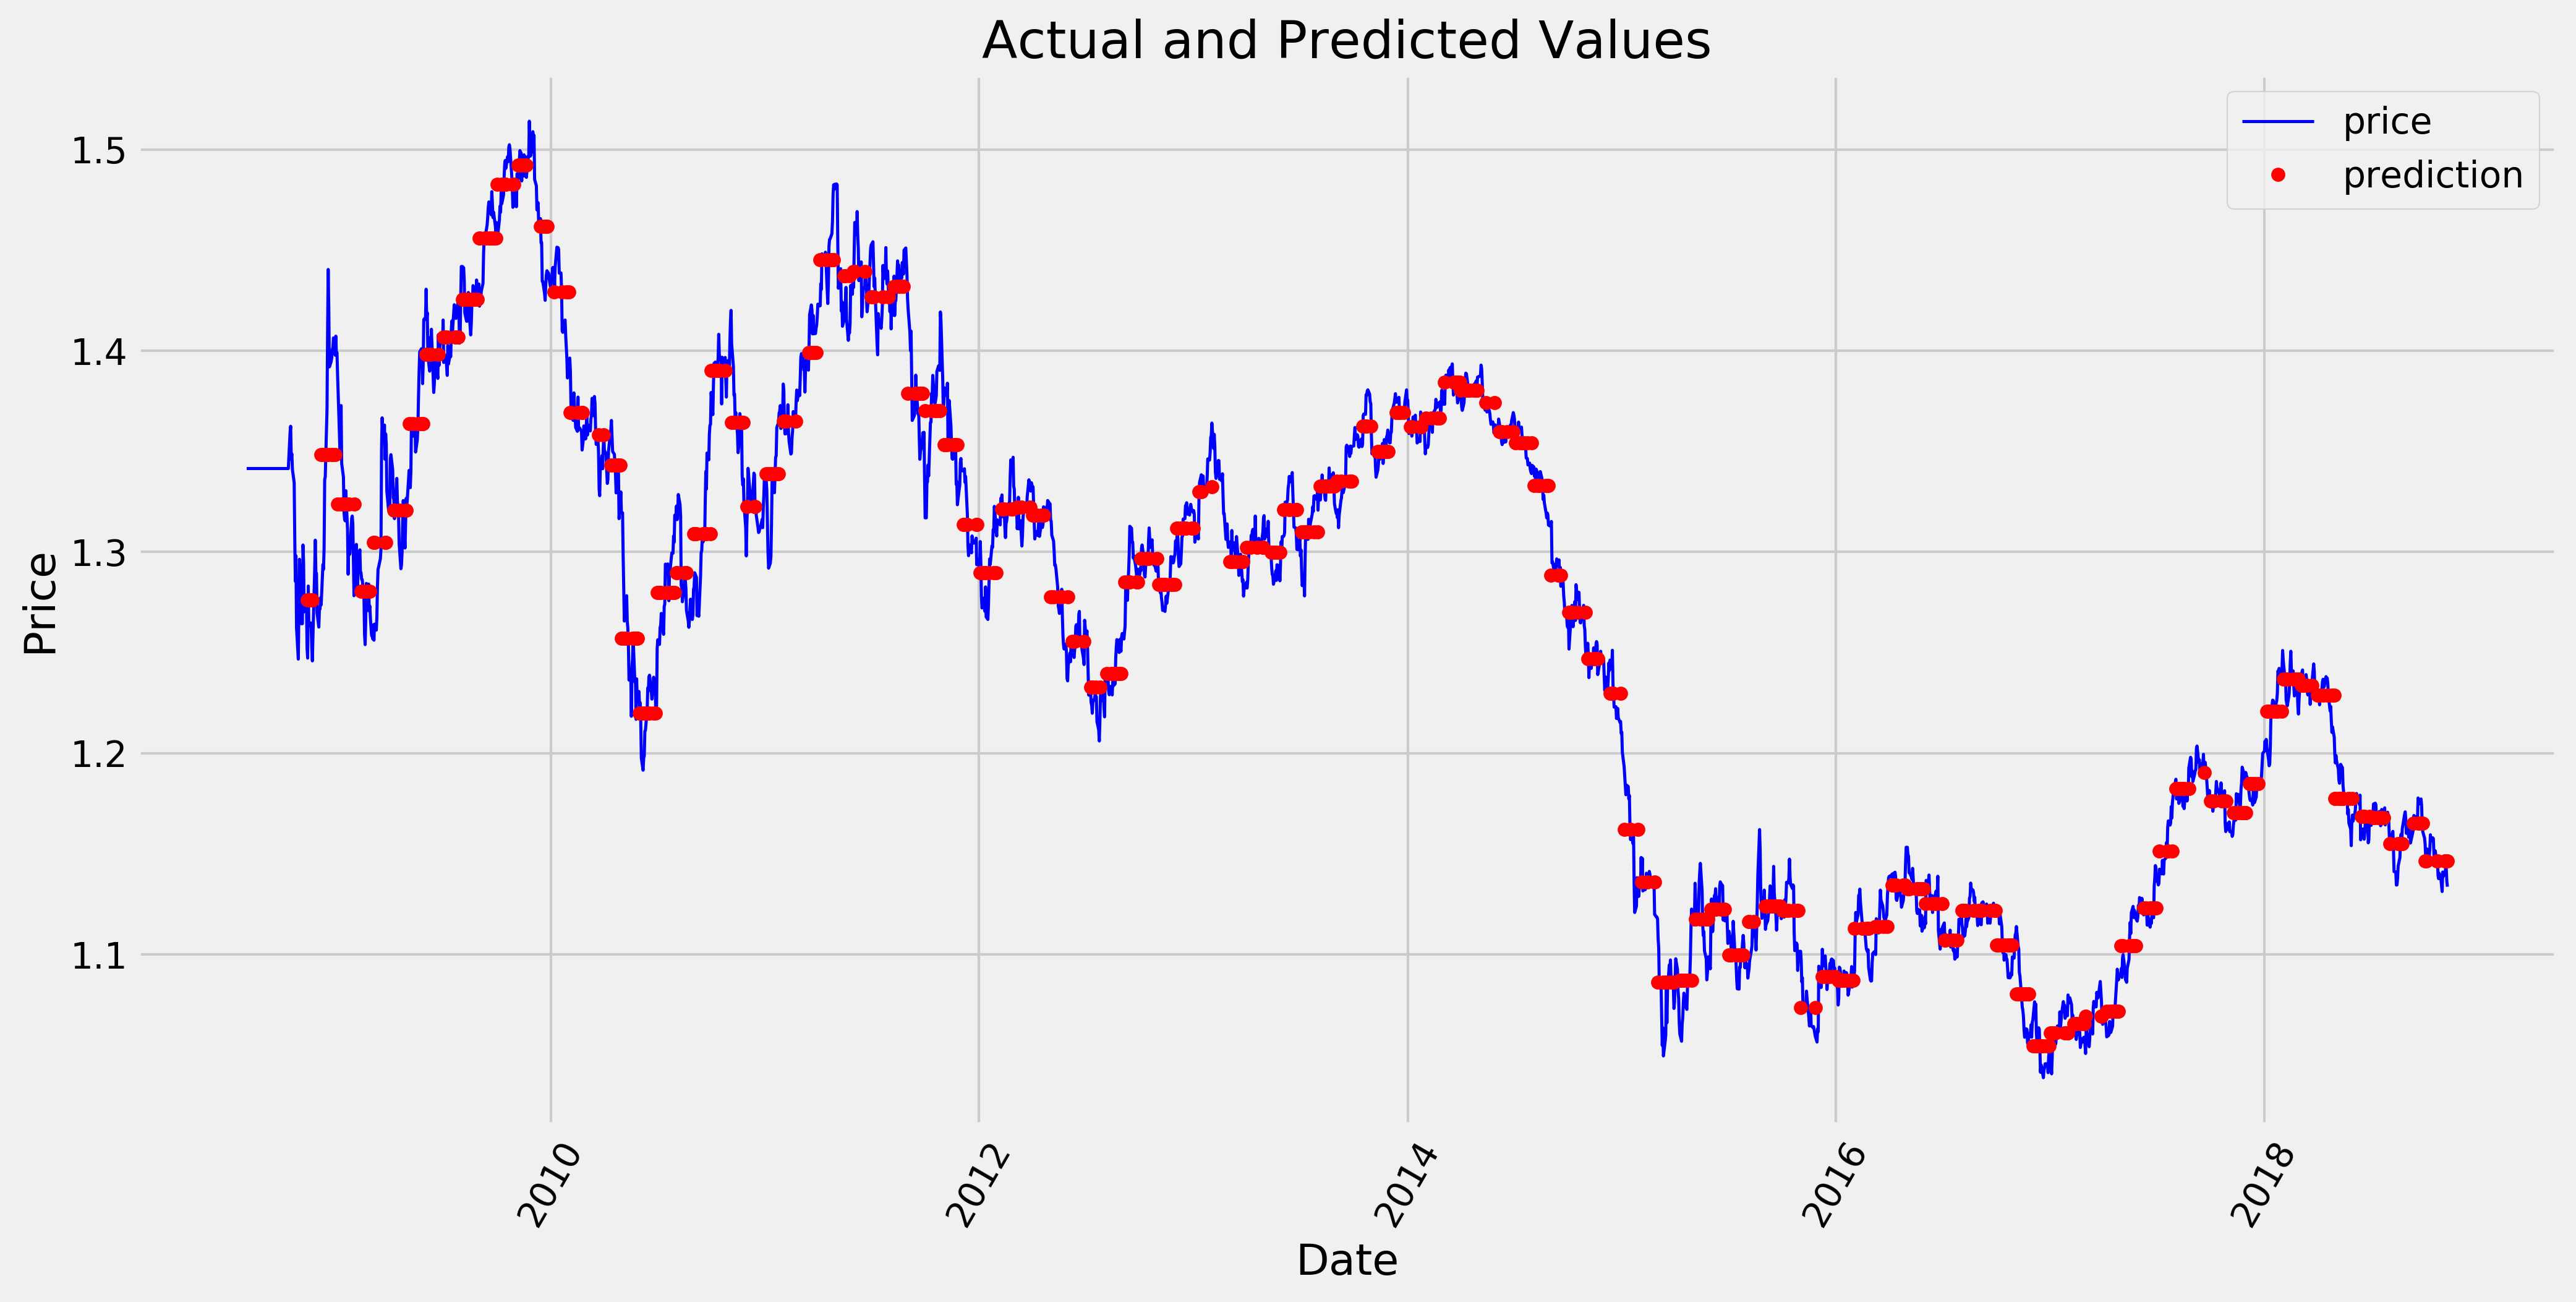

In [216]:
# Use datetime for creating date objects for plotting
import datetime

dates = df[['Date']].copy()

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates['Date'], 'price': labels})


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': dt['Date'], 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['price'], 'b-', label = 'price')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Price'); plt.title('Actual and Predicted Values');

In [58]:
dates = df[['Date']].copy()

In [59]:
dates

,Date
0,2008-07-31
1,2008-10-01
2,2008-10-10
3,2008-10-13
4,2008-10-14
5,2008-10-15
6,2008-10-16
7,2008-10-17
8,2008-10-20
9,2008-10-21


In [61]:
true_data = pd.DataFrame(data = {'date': dates['Date'], 'price': labels})

In [62]:
true_data

,date,price
0,2008-07-31,1.3414
1,2008-10-01,1.3414
2,2008-10-10,1.3414
3,2008-10-13,1.3593
4,2008-10-14,1.3624
5,2008-10-15,1.3460
6,2008-10-16,1.3487
7,2008-10-17,1.3409
8,2008-10-20,1.3344
9,2008-10-21,1.3059


In [86]:
len(t)

671

In [87]:
dt = pd.DataFrame(t)

In [90]:
dt['Date'] = pd.to_datetime(dt[0])

In [100]:
df['Date'] = pd.to_datetime(df['Date'])

In [91]:
dt

,0,Date
0,2011-07-31,2011-07-31
1,2015-01-29,2015-01-29
2,2014-06-06,2014-06-06
3,2015-09-15,2015-09-15
4,2009-07-24,2009-07-24
5,2009-05-28,2009-05-28
6,2017-08-18,2017-08-18
7,2010-05-20,2010-05-20
8,2015-10-20,2015-10-20
9,2011-09-16,2011-09-16


In [ ]:
################## prediction

In [118]:
p = pd.read_csv('full.csv')

In [119]:
p.head()

,Unnamed: 0,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
0,2008-07-31,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
1,2008-10-01,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2,2008-10-10,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
3,2008-10-13,1.3593,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
4,2008-10-14,1.3624,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131


In [120]:
p.set_index('Unnamed: 0', inplace = True)

In [121]:
p.index.names = ['Date']

In [122]:
p.reset_index(inplace = True)

In [123]:
p

,Date,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
0,2008-07-31,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
1,2008-10-01,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2,2008-10-10,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
3,2008-10-13,1.3593,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
4,2008-10-14,1.3624,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
5,2008-10-15,1.3460,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
6,2008-10-16,1.3487,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
7,2008-10-17,1.3409,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
8,2008-10-20,1.3344,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
9,2008-10-21,1.3059,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131


In [125]:
p = p.drop('Price', axis = 1)

In [126]:
f = pd.get_dummies(p)

In [127]:
f

,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19,Date_2008-07-31,Date_2008-10-01,...,Date_2018-10-29,Date_2018-10-30,Date_2018-10-31,Date_2018-11-01,Date_2018-11-02,Date_2018-11-05,Date_2018-11-06,Date_2018-11-07,Date_2018-11-08,Date_2018-11-09
0,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,1,...,0,0,0,0,0,0,0,0,0,0
2,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
5,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
6,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
7,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
8,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0
9,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
f1 = np.array(f.iloc[[2680]])

In [179]:
f1

array([[57.7     , 52.      ,  0.449432, ...,  0.      ,  0.      ,
         1.      ]])

In [167]:
f2 = f[2660:2680]

In [168]:
f2

,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19,Date_2008-07-31,Date_2008-10-01,...,Date_2018-10-29,Date_2018-10-30,Date_2018-10-31,Date_2018-11-01,Date_2018-11-02,Date_2018-11-05,Date_2018-11-06,Date_2018-11-07,Date_2018-11-08,Date_2018-11-09
2660,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2661,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2662,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2663,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2664,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2665,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2666,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2667,59.8,53.2,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,59.8,52.1,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0
2669,59.8,52.1,0.449432,0.863897,1.5603,3.15,2.37,-0.3177,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
predi2 = rf.predict(f2)

In [186]:
predi = rf.predict(f1)

In [187]:
predi

array([1.14033888])

In [170]:
predi2

array([1.15486546, 1.1559293 , 1.15571479, 1.15164936, 1.14852902,
       1.15235356, 1.1533981 , 1.1533981 , 1.13853746, 1.13782188,
       1.13931809, 1.13778434, 1.13599204, 1.13399757, 1.14078453,
       1.13984745, 1.14033888, 1.14033888, 1.14170777, 1.1386407 ])

In [157]:
check = pd.read_csv('full.csv')

In [158]:
check

,Unnamed: 0,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
0,2008-07-31,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
1,2008-10-01,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2,2008-10-10,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
3,2008-10-13,1.3593,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
4,2008-10-14,1.3624,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
5,2008-10-15,1.3460,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
6,2008-10-16,1.3487,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
7,2008-10-17,1.3409,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
8,2008-10-20,1.3344,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
9,2008-10-21,1.3059,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131


In [217]:
p2 = pd.DataFrame(predi2)

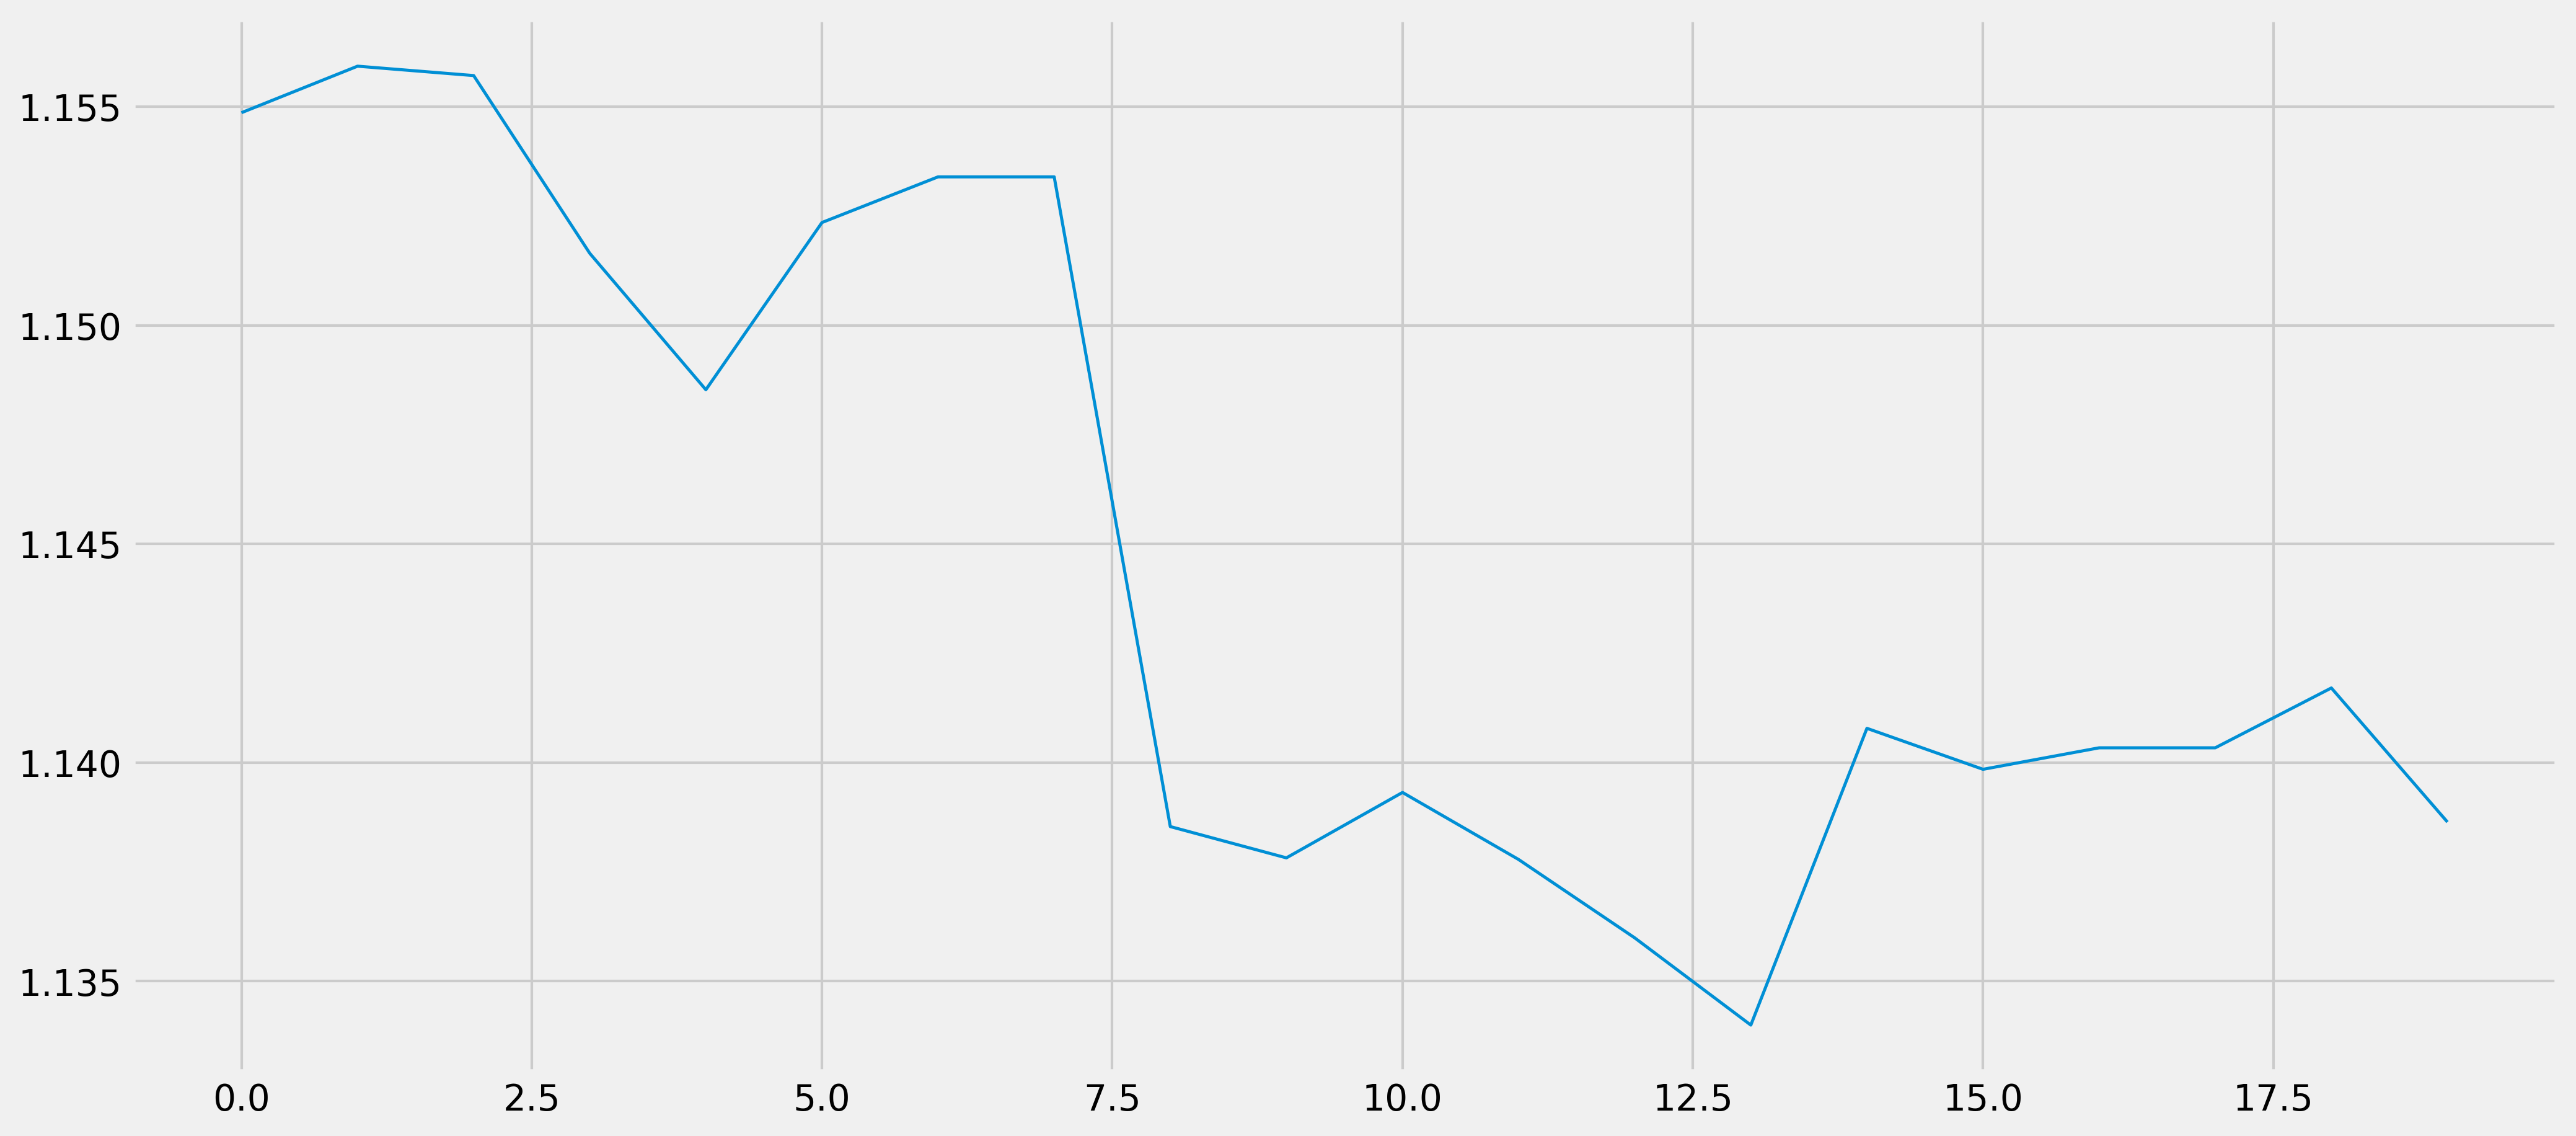

In [219]:
plt.plot(p2)

In [220]:
p2

,0
0,1.154865
1,1.155929
2,1.155715
3,1.151649
4,1.148529
5,1.152354
6,1.153398
7,1.153398
8,1.138537
9,1.137822
